In [44]:
import seaborn as sns; sns.set()

In [45]:
sns.set_style("whitegrid")

In [46]:
import matplotlib.pyplot as plt

In [47]:
import pandas as pd

In [3]:
fmri = sns.load_dataset("fmri")

In [8]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [48]:
import codecs
import glob
import os

In [49]:
myfiles = {}
for val_los_file in glob.glob(os.path.join("/Users/paggarwal/Downloads/segthor_val_loss","*.log_val")):
    with codecs.open(val_los_file, 'r', 'utf-8') as in_obj:
        epoch = 0
        file_component = {}
        file_component['Total Loss'] = []
        file_component['Background'] = []
        file_component['Esophagus'] = []
        file_component['Heart'] = []
        file_component['Trachea'] = []
        file_component['Aorta'] = []
        file_component['epoch'] = []
        for i,line in enumerate(in_obj):
            comp_dict = {}
            total_dict = {}
            if 'Dice' in line or 'Modified' in line:
                line = line.split(':')
                components = line[1].strip().replace(' = ', '=').split(' ')
                for comp in components:
                    if '=' in comp:
                        if comp.split('=')[0] == 'Eusophagus':
                            key = 'Esophagus'
                        else:
                            key = comp.split('=')[0]
                        file_component[key].append(comp.split('=')[1])
                epoch += 1
                file_component['epoch'].append(epoch)
            if 'Total' in line:
                line = line.split(':')
                if line[0] == 'Total Val Loss':
                    key1 = 'Total Loss'
                elif line[0] == 'Total loss':
                    key1 = 'Total Loss'
                else:
                    key1 = line[0]
                file_component[key1].append(line[1].strip().replace('\n', ''))
                        
    myfiles[os.path.basename(val_los_file)] = file_component  
    


In [50]:
print(myfiles)

{'vanilla_vnet.log_val': {'Total Loss': ['4.2398', '4.0191', '4.0689', '3.7001', '3.9536', '3.4872', '3.5074', '3.3874', '3.6146', '3.4879', '3.3562', '3.4248', '3.0381', '3.4303', '3.1756', '2.8809', '2.8325', '2.8541', '2.4001', '2.4155', '2.4826', '2.5560', '2.4621', '2.2396', '2.9942', '2.0743', '2.1424', '2.2345', '2.1367', '1.9887', '1.7258', '1.9695', '1.9771', '2.3262', '1.8416', '1.8830', '1.7188', '1.7865', '1.7956', '1.8387', '1.8709', '1.9076', '1.6987', '1.6627', '1.6280', '1.5147', '1.5467', '1.6852', '1.5770', '2.2543', '1.4837', '1.4244', '1.9819', '1.6190', '1.4722', '1.8883', '1.6063', '1.3491', '1.6713', '1.7561', '1.4167', '1.4067', '1.6081', '1.5597', '1.6558', '1.7065', '1.6294', '1.4693', '1.4871', '1.2901', '1.5777', '1.6687', '1.4218', '1.3548', '1.3052', '1.3277', '1.2726', '1.5183', '1.2515', '1.2401', '1.2548', '1.2369', '1.6261', '1.4176', '1.9020', '1.2353', '1.3297', '1.1744', '1.1858', '1.0543', '1.2358', '1.2139', '1.3472', '1.2498', '1.1379', '1.2093',

In [51]:
df_dict = {}

In [52]:
df_dict_vanilla_vnet = pd.DataFrame.from_dict(myfiles['vanilla_vnet.log_val'])

In [53]:
df_dict_vanilla_unet = pd.DataFrame.from_dict(myfiles['vanilla_unet.log_val'])

In [54]:
df_dict_unet_lateFusion = pd.DataFrame.from_dict(myfiles['unet_lateFusion.log_val'])

In [55]:
df_dict_unet_earlyFusion = pd.DataFrame.from_dict(myfiles['unet_earlyFusion.log_val'])

In [56]:
df_dict_vanilla_unet

,Total Loss,Background,Esophagus,Heart,Trachea,Aorta,epoch
0,2.0990,0.0036,0.5362,0.3028,0.9154,0.3411,1
1,1.4445,0.0065,0.4270,0.4450,0.2072,0.3589,2
2,0.8695,0.0021,0.3257,0.1796,0.1827,0.1793,3
3,0.9160,0.0021,0.3538,0.1784,0.1967,0.1850,4
4,0.8829,0.0018,0.3149,0.1409,0.2401,0.1852,5
5,0.8583,0.0018,0.3068,0.1458,0.2005,0.2034,6
6,0.7664,0.0018,0.2831,0.1660,0.1849,0.1307,7
7,0.7173,0.0015,0.2997,0.1275,0.1538,0.1348,8
8,0.7231,0.0014,0.3001,0.1194,0.1621,0.1402,9
9,0.7707,0.0019,0.3099,0.1647,0.1576,0.1366,10


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/paggarwal/miniconda3/envs/model_clone/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/paggarwal/miniconda3/envs/model_clone/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


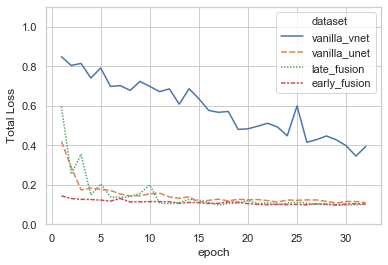

In [59]:

df_dict_vanilla_vnet = pd.DataFrame.from_dict(myfiles['vanilla_vnet.log_val'])
df_dict_vanilla_unet = pd.DataFrame.from_dict(myfiles['vanilla_unet.log_val'])
df_dict_unet_lateFusion = pd.DataFrame.from_dict(myfiles['unet_lateFusion.log_val'])
df_dict_unet_earlyFusion = pd.DataFrame.from_dict(myfiles['unet_earlyFusion.log_val'])
df_dict_vanilla_vnet_32_epocs = df_dict_vanilla_vnet.head(32)
df_dict_vanilla_vnet_32_epocs['Total Loss'] = df_dict_vanilla_vnet_32_epocs['Total Loss'].astype(float)
df_dict_vanilla_vnet_32_epocs['Total Loss'] = df_dict_vanilla_vnet_32_epocs['Total Loss']/5
df_dict_vanilla_unet['Total Loss'] = df_dict_vanilla_unet['Total Loss'].astype(float)
df_dict_vanilla_unet['Total Loss'] = df_dict_vanilla_unet['Total Loss']/5
df_dict_unet_lateFusion['Total Loss'] = df_dict_unet_lateFusion['Total Loss'].astype(float)
df_dict_unet_earlyFusion['Total Loss'] = df_dict_unet_earlyFusion['Total Loss'].astype(float)
concatenated = pd.concat([df_dict_vanilla_vnet_32_epocs.assign(dataset='vanilla_vnet'), 
                          df_dict_vanilla_unet.assign(dataset='vanilla_unet'), 
                          df_dict_unet_lateFusion.assign(dataset='late_fusion'),
                         df_dict_unet_earlyFusion.assign(dataset='early_fusion')])
sns.lineplot(x='epoch', y='Total Loss', data=concatenated, hue="dataset", style='dataset')
plt.ylim(0, 1.1)
plt.savefig('/Users/paggarwal/Downloads/segthor_val_loss/total_loss.png')

/Users/paggarwal/miniconda3/envs/model_clone/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


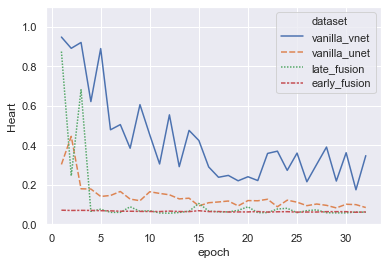

In [40]:
df_dict_vanilla_vnet_32_epocs['Heart'] = df_dict_vanilla_vnet_32_epocs['Heart'].astype(float)
df_dict_vanilla_unet['Heart'] = df_dict_vanilla_unet['Heart'].astype(float)
df_dict_unet_lateFusion['Heart'] = df_dict_unet_lateFusion['Heart'].astype(float)
df_dict_unet_earlyFusion['Heart'] = df_dict_unet_earlyFusion['Heart'].astype(float)
concatenated = pd.concat([df_dict_vanilla_vnet_32_epocs.assign(dataset='vanilla_vnet'), 
                          df_dict_vanilla_unet.assign(dataset='vanilla_unet'), 
                          df_dict_unet_lateFusion.assign(dataset='late_fusion'),
                          df_dict_unet_earlyFusion.assign(dataset='early_fusion')])

sns.lineplot(x='epoch', y='Heart', data=concatenated, hue="dataset", style='dataset')
plt.ylim(0, 1.1)
plt.savefig('/Users/paggarwal/Downloads/segthor_val_loss/heart_loss.png', dpi=400)

/Users/paggarwal/miniconda3/envs/model_clone/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


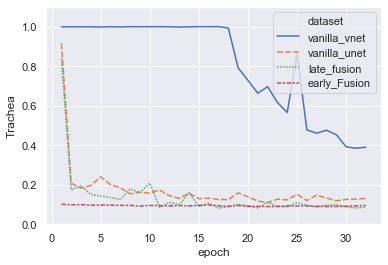

In [41]:
df_dict_vanilla_vnet_32_epocs['Trachea'] = df_dict_vanilla_vnet_32_epocs['Trachea'].astype(float)
df_dict_vanilla_unet['Trachea'] = df_dict_vanilla_unet['Trachea'].astype(float)
df_dict_unet_lateFusion['Trachea'] = df_dict_unet_lateFusion['Trachea'].astype(float)
df_dict_unet_earlyFusion['Trachea'] = df_dict_unet_earlyFusion['Trachea'].astype(float)
concatenated = pd.concat([df_dict_vanilla_vnet_32_epocs.assign(dataset='vanilla_vnet'), 
                          df_dict_vanilla_unet.assign(dataset='vanilla_unet'), 
                          df_dict_unet_lateFusion.assign(dataset='late_fusion'),
                         df_dict_unet_earlyFusion.assign(dataset='early_Fusion')])

sns.lineplot(x='epoch', y='Trachea', data=concatenated, hue= "dataset", style='dataset')
plt.ylim(0, 1.1)
plt.savefig('/Users/paggarwal/Downloads/segthor_val_loss/trachea_loss.png', dpi=400)

/Users/paggarwal/miniconda3/envs/model_clone/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


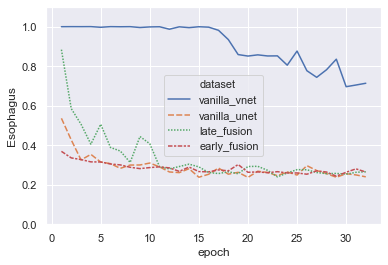

In [42]:

df_dict_vanilla_vnet_32_epocs['Esophagus'] = df_dict_vanilla_vnet_32_epocs['Esophagus'].astype(float)
df_dict_vanilla_unet['Esophagus'] = df_dict_vanilla_unet['Esophagus'].astype(float)
df_dict_unet_lateFusion['Esophagus'] = df_dict_unet_lateFusion['Esophagus'].astype(float)
df_dict_unet_earlyFusion['Esophagus'] = df_dict_unet_earlyFusion['Esophagus'].astype(float)
concatenated = pd.concat([df_dict_vanilla_vnet_32_epocs.assign(dataset='vanilla_vnet'), 
                          df_dict_vanilla_unet.assign(dataset='vanilla_unet'), 
                          df_dict_unet_lateFusion.assign(dataset='late_fusion'),
                         df_dict_unet_earlyFusion.assign(dataset='early_fusion')])

sns.lineplot(x='epoch', y='Esophagus', data=concatenated, hue = "dataset", style='dataset')
plt.ylim(0, 1.1)
plt.savefig('/Users/paggarwal/Downloads/segthor_val_loss/esophagus_loss.png', dpi=400)

/Users/paggarwal/miniconda3/envs/model_clone/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


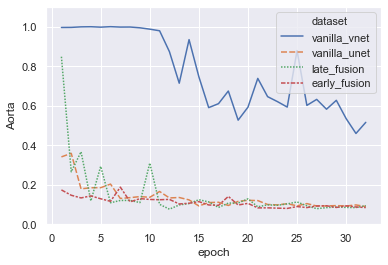

In [43]:

df_dict_vanilla_vnet_32_epocs['Aorta'] = df_dict_vanilla_vnet_32_epocs['Aorta'].astype(float)
df_dict_vanilla_unet['Aorta'] = df_dict_vanilla_unet['Aorta'].astype(float)
df_dict_unet_lateFusion['Aorta'] = df_dict_unet_lateFusion['Aorta'].astype(float)
df_dict_unet_earlyFusion['Aorta'] = df_dict_unet_earlyFusion['Aorta'].astype(float)
concatenated = pd.concat([df_dict_vanilla_vnet_32_epocs.assign(dataset='vanilla_vnet'), 
                          df_dict_vanilla_unet.assign(dataset='vanilla_unet'), 
                          df_dict_unet_lateFusion.assign(dataset='late_fusion'),
                         df_dict_unet_earlyFusion.assign(dataset='early_fusion')])

sns.lineplot(x='epoch', y='Aorta', data=concatenated, hue = "dataset", style='dataset')
plt.ylim(0, 1.1)
plt.savefig('/Users/paggarwal/Downloads/segthor_val_loss/aorta_loss.png', dpi=400)